#Install Library

In [11]:
!pip install tensorflow

# Load Dataset

## Import Packages

In [12]:
import pandas as pd

In [13]:
# Load dataset
data_saving = "Monthly_Savings.csv"
data = pd.read_csv(data_saving)

In [14]:
data

,Income;Savings;Daily Expenditure
0,3.501.157;1.401.323;69.994
1,14.002.109;5.919.166;269.431
2,8.946.594;4.439.318;150.242
3,14.310.552;3.792.969;350.586
4,14.471.761;3.600.678;362.369
...,...
195,5.989.475;1.386.567;153.430
196,19.679.640;6.954.004;424.187
197,6.369.720;1.248.836;170.696
198,7.711.075;1.005.102;223.532


In [15]:
# Membagi kolom tunggal menjadi tiga kolom berdasarkan pemisah ";"
data_split = data["Income;Savings;Daily Expenditure"].str.split(";", expand=True)
data_split.columns = ["Income", "Savings", "Daily Expenditure"]

In [16]:
# Menghilangkan titik pada angka/data
for col in data_split.columns:
    data_split[col] = data_split[col].str.replace(".", "").astype(int)

data_split.head()

,Income,Savings,Daily Expenditure
0,3501157,1401323,69994
1,14002109,5919166,269431
2,8946594,4439318,150242
3,14310552,3792969,350586
4,14471761,3600678,362369


# Train-Test Split dan TensorFlow Model

In [17]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [18]:
# Mentukan fitur (X) dan target (y)
X = data_split[["Income", "Savings"]]
y = data_split["Daily Expenditure"]

# Membagi data menjadi set train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Membangun neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [21]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 328886288384.0000 - mae: 471807.0000 - val_loss: 87220748288.0000 - val_mae: 258192.7812
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 41793253376.0000 - mae: 169706.4531 - val_loss: 49403764736.0000 - val_mae: 191296.8438
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18399961088.0000 - mae: 112831.0312 - val_loss: 26241335296.0000 - val_mae: 140011.7656
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13733326848.0000 - mae: 97926.3047 - val_loss: 11980574720.0000 - val_mae: 91425.5781
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 8388932096.0000 - mae: 73728.4219 - val_loss: 6415501312.0000 - val_mae: 67815.4531
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3043467776.0000 - mae: 46357.5195 - val_loss: 2227143424.0000 - val_mae: 38654.8008
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1515379712.0000 - mae: 31237.1016 - val_loss: 1208444928.0000 - val_mae: 28878.355

In [22]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5051909.5000 - mae: 1698.1246  
Test Loss: 5175327.0, Test MAE: 1734.719482421875


# Visualisasi Hasil

In [23]:
import matplotlib.pyplot as plt

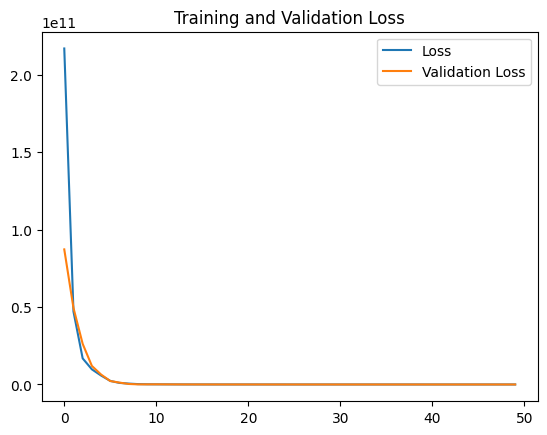

In [24]:
# Plot training history
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Melakukan Tunning

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# Model dengan hyperparameter yang diubah
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # 128 Neuron
    Dense(64, activation='relu'),  # 64 Neuron
    Dense(1)  # Output Layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compile model dengan learning rate yang berbeda
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)  # Learning rate yang diubah
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [28]:
# Train model dengan batch size dan epochs yang diubah
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 3165145792512.0000 - mae: 1402629.8750 - val_loss: 1924493082624.0000 - val_mae: 1242914.0000
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1195674566656.0000 - mae: 937628.5625 - val_loss: 157293789184.0000 - val_mae: 354469.5312
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 284732850176.0000 - mae: 477715.2188 - val_loss: 202761699328.0000 - val_mae: 402066.2188
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 93147750400.0000 - mae: 255695.3281 - val_loss: 16731106304.0000 - val_mae: 116730.4141
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 39004323840.0000 - mae: 170453.1875 - val_loss: 67132137472.0000 - val_mae: 233826.9688
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 41587146752.0000 - mae: 172661.2812 - val_loss: 11774953472.0000 - val_mae: 94286.9141
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16495278080.0000 - mae: 112645.1562 - val_loss: 4748180992.0000

In [29]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2860030.2500 - mae: 1122.0823 
Test Loss: 2867759.25, Test MAE: 1127.5181884765625


# Visualisasi Hasil

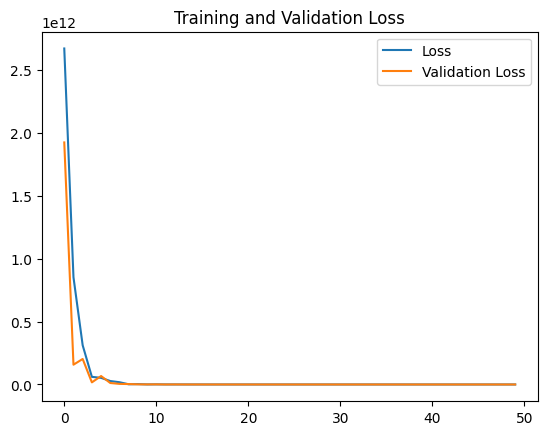

In [30]:
# Plot training history
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Saved Model

In [34]:
model.save("my_model_saved.h5")

In [41]:
model.save('my_model.keras')